In [1]:
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [9]:
years = range(2000,2015)
Location = r'C:\Users\GBTC441003ur\names\\'

pieces = []
columns=['name','sex','births']

for year in years:
    path = Location + 'yob%d.txt' % year
         
    frame = pd.read_csv(path, names=columns)
         
    frame['year'] = year
    pieces.append(frame)
         
names = pd.concat(pieces, ignore_index=True)
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492895 entries, 0 to 492894
Data columns (total 4 columns):
name      492895 non-null object
sex       492895 non-null object
births    492895 non-null int64
year      492895 non-null int64
dtypes: int64(2), object(2)
memory usage: 15.0+ MB


In [2]:
path_to_zip_file = "names.zip"
directory_to_extract_to = ""

import zipfile
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [10]:
total_births = names.pivot_table('births',index=['year'],columns='sex',aggfunc=sum)

In [11]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


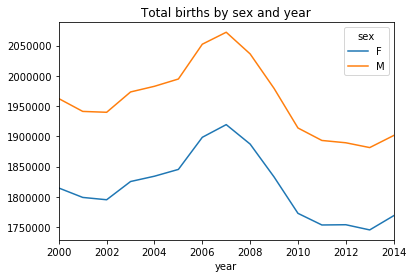

In [12]:
total_births.plot(title='Total births by sex and year')
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [13]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492895 entries, 0 to 492894
Data columns (total 5 columns):
name      492895 non-null object
sex       492895 non-null object
births    492895 non-null int64
year      492895 non-null int64
prop      492895 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 18.8+ MB


In [15]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [17]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:100]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000

name sex  births  year      prop
year sex                                              
2000 F   0           Emily   F   25952  2000  0.014302
         1          Hannah   F   23073  2000  0.012715
         2         Madison   F   19967  2000  0.011004
         3          Ashley   F   17995  2000  0.009917
         4           Sarah   F   17687  2000  0.009747
         5          Alexis   F   17627  2000  0.009714
         6        Samantha   F   17264  2000  0.009514
         7         Jessica   F   15704  2000  0.008654
         8       Elizabeth   F   15088  2000  0.008315
         9          Taylor   F   15078  2000  0.008309
         10         Lauren   F   14172  2000  0.007810
         11         Alyssa   F   13552  2000  0.007468
         12          Kayla   F   13310  2000  0.007335
         13        Abigail   F   13087  2000  0.007212
         14        Brianna   F   12873  2000  0.007094
         15         Olivia   F   12852  2000  0.007083
         16           Emma   F   12540  2000  0.006911
         17          Megan   F   11433  2000  0.006301
         18          Grace   F   11283  2000  0.006218
         19       Victoria   F   10922  2000  0.006019
         20         Rachel   F   10665  2000  0.005877
         21           Anna   F   10580  2000  0.005830
         22         Sydney   F   10242  2000  0.005644
         23        Destiny   F    9844  2000  0.005425
         24         Morgan   F    9502  2000  0.005236
         25       Jennifer   F    9385  2000  0.005172
         26        Jasmine   F    9092  2000  0.005010
         27          Haley   F    9068  2000  0.004997
         28          Julia   F    8764  2000  0.004830
         29        Kaitlyn   F    8757  2000  0.004826
...                    ...  ..     ...   ...       ...
2014 M   478988    Brandon   M    5804  2014  0.003053
         478989      Tyler   M    5785  2014  0.003043
         478990     Parker   M    5677  2014  0.002986
         478991      Ayden   M    5586  2014  0.002938
         478992      Jason   M    5510  2014  0.002898
         478993       Jose   M    5442  2014  0.002862
         478994        Ian   M    5422  2014  0.002852
         478995      Chase   M    5322  2014  0.002799
         478996       Adam   M    5293  2014  0.002784
         478997     Hudson   M    5199  2014  0.002734
         478998      Nolan   M    5181  2014  0.002725
         478999    Zachary   M    5137  2014  0.002702
         479000     Easton   M    4961  2014  0.002609
         479001      Blake   M    4913  2014  0.002584
         479002     Jaxson   M    4900  2014  0.002577
         479003     Cooper   M    4803  2014  0.002526
         479004    Lincoln   M    4785  2014  0.002517
         479005     Xavier   M    4726  2014  0.002486
         479006    Bentley   M    4722  2014  0.002483
         479007     Kayden   M    4691  2014  0.002467
         479008     Carson   M    4580  2014  0.002409
         479009      Brody   M    4297  2014  0.002260
         479010      Asher   M    4279  2014  0.002250
         479011  Nathaniel   M    4257  2014  0.002239
         479012      Ryder   M    4073  2014  0.002142
         479013     Justin   M    3991  2014  0.002099
         479014        Leo   M    3936  2014  0.002070
         479015       Juan   M    3887  2014  0.002044
         479016       Luis   M    3879  2014  0.002040
         479017     Camden   M    3872  2014  0.002036

[3000 rows x 5 columns]

In [18]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index=['year'],columns='name',aggfunc=sum)
total_births

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaliyah,Aaron,Abigail,Adam,Addison,Adrian,Aidan,Aiden,Alejandro,Alex,...,Victor,Victoria,Violet,Vivian,William,Wyatt,Xavier,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,9551.0,13087.0,8133.0,NaN,5337.0,NaN,NaN,4509.0,6744.0,...,4050.0,10922.0,NaN,NaN,20650.0,NaN,NaN,19848.0,3785.0,NaN
2001,3352.0,9531.0,14803.0,7749.0,NaN,5424.0,4632.0,NaN,4554.0,6613.0,...,3918.0,10177.0,NaN,NaN,20094.0,NaN,3977.0,18183.0,4644.0,NaN
2002,4778.0,8997.0,15293.0,7749.0,NaN,5679.0,6952.0,NaN,4354.0,6805.0,...,3932.0,9778.0,NaN,NaN,20117.0,NaN,4647.0,16622.0,4883.0,NaN
2003,3671.0,8859.0,15918.0,7684.0,NaN,6108.0,10061.0,5683.0,4315.0,6791.0,...,4434.0,9242.0,NaN,NaN,19987.0,NaN,5063.0,15537.0,5084.0,NaN
2004,3485.0,8386.0,15423.0,7468.0,NaN,6136.0,9817.0,7157.0,4450.0,6803.0,...,NaN,8269.0,NaN,NaN,20221.0,4972.0,5011.0,13707.0,5361.0,NaN
2005,3455.0,7799.0,15747.0,6836.0,NaN,6715.0,9756.0,9080.0,4478.0,6479.0,...,NaN,7952.0,NaN,NaN,19041.0,5351.0,4871.0,12278.0,4956.0,NaN
2006,3739.0,8290.0,15623.0,6789.0,7617.0,7378.0,10030.0,11577.0,4547.0,6666.0,...,NaN,7644.0,NaN,NaN,18941.0,5833.0,6172.0,11001.0,5152.0,NaN
2007,3951.0,8932.0,15461.0,6779.0,11943.0,7730.0,8418.0,13093.0,NaN,6267.0,...,NaN,7425.0,NaN,NaN,18869.0,6520.0,6551.0,10210.0,4931.0,NaN
2008,4038.0,8530.0,15072.0,6085.0,10755.0,7921.0,7695.0,15569.0,NaN,5393.0,...,NaN,7113.0,NaN,NaN,18380.0,7307.0,6270.0,9221.0,4776.0,3442.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ECCD240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE55E10>], dtype=object)

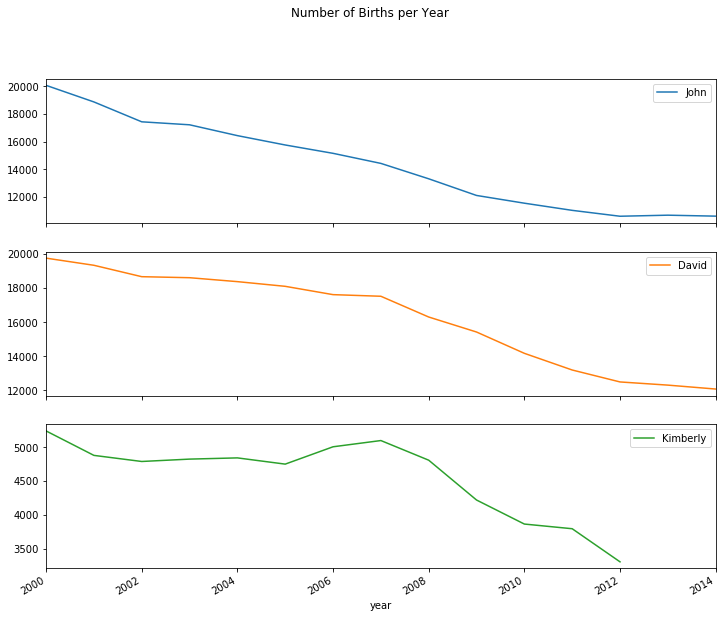

In [28]:
subset = total_births[['John','David','Kimberly']]
subset.plot(subplots=True, figsize=(12,10),grid=False,title="Number of Births per Year")